In [2]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os
import string
from matplotlib.dates import DateFormatter, HourLocator

Checklist:
- a ~ y
- zaa ~ zaz (a third of the data)
- zbaa ~ zbmz

In [ ]:
# String containing all alphabetical letters
alphabet = string.ascii_lowercase


# column name
columns = ['date', 'time', 'trx_id', 'trx_type', 'trx_status', 'category', 'business_type_class', 'wallet_number_from', 'wallet_number_to', 'amount', 'description', 'currency', 'invoice_details', 'ip', 'browser_environment']

df = pd.DataFrame({})

# select your first prefix
for first_letter in alphabet:
    for letter in alphabet:
        doc_name = 'segment' + first_letter + letter
        
        #print(doc_name)
        seg_df = pd.read_csv(doc_name, names = columns)
        df = pd.concat([df,seg_df], axis = 0)

df.reset_index(drop = True)


In [ ]:
# Column names you want to use
columns = ['date', 'time', 'trx_id', 'trx_type', 'trx_status', 'category', 'business_type_class', 'wallet_number_from', 'wallet_number_to', 'amount', 'description', 'currency', 'invoice_details', 'ip', 'browser_environment']

# Define your file path pattern
file_pattern_b = 'segmentb*'
file_pattern_c = 'segmentc*'

# Use glob to find files that match the patterns
files_b = glob.glob(file_pattern_b)
files_c = glob.glob(file_pattern_c)

# Combine the lists of files
files_to_read = files_b + files_c

# Read each file with the specified column names and append it to a list of DataFrames
dfs = [pd.read_csv(file, names=columns, header=None) for file in files_to_read]

# Concatenate all DataFrames in the list into a single DataFrame, ignoring the file's original header if it exists
combined_df = pd.concat(dfs, ignore_index=True)

# Now combined_df contains all the data from the files starting with 'segmentb' and 'segmentc', with your specified columns


In [ ]:
df.tail()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520000 entries, 0 to 519999
Data columns (total 15 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   date                 520000 non-null  object 
 1   time                 520000 non-null  object 
 2   trx_id               520000 non-null  object 
 3   trx_type             520000 non-null  object 
 4   trx_status           520000 non-null  object 
 5   category             520000 non-null  object 
 6   business_type_class  520000 non-null  object 
 7   wallet_number_from   485673 non-null  float64
 8   wallet_number_to     520000 non-null  int64  
 9   amount               520000 non-null  float64
 10  description          520000 non-null  object 
 11  currency             520000 non-null  object 
 12  invoice_details      520000 non-null  object 
 13  ip                   520000 non-null  object 
 14  browser_environment  520000 non-null  object 
dtypes: float64(2), in

In [8]:
df.shape

(520000, 15)

In [9]:
df['datetime'] = pd.to_datetime(df['date'].astype(str) +' '+ df['time'].astype(str))

In [10]:
# Check for null values and count them
null_counts = df.isnull().sum()

# Display the count of null values for each column
print("Null Values Count:")
print(null_counts)

Null Values Count:
date                       0
time                       0
trx_id                     0
trx_type                   0
trx_status                 0
category                   0
business_type_class        0
wallet_number_from     34327
wallet_number_to           0
amount                     0
description                0
currency                   0
invoice_details            0
ip                         0
browser_environment        0
datetime                   0
dtype: int64


In [11]:
# Get all unique values in 'trx_type'
unique_trx_types = df['trx_type'].unique()
unique_trx_statuses = df['trx_status'].unique()
unique_categories = df['category'].unique()
unique_business_types = df['business_type_class'].unique()
unique_currency = df['currency'].unique()

# Display the unique values
print("Unique Values in 'trx_type':")
print(unique_trx_types)
print("Unique Values in 'trx_status':")
print(unique_trx_statuses)
print("Unique Values in 'category':")
print(unique_categories)
print("Unique Values in 'business_type_class':")
print(unique_business_types)
print("Unique Values in 'currency':")
print(unique_currency)

Unique Values in 'trx_type':
['client_transaction_issue' 'client_transaction_transfer']
Unique Values in 'trx_status':
['processed']
Unique Values in 'category':
['Home' 'Kids' 'Music' 'Clothing' 'Health' 'Outdoors' 'Automotive'
 'Sports' 'Toys' 'Baby' 'Jewelery' 'Games' 'Beauty' 'Tools' 'Garden'
 'Computers' 'Industrial' 'Grocery' 'Electronics' 'Movies' 'Shoes' 'Books']
Unique Values in 'business_type_class':
['ClientTransactionProcess']
Unique Values in 'currency':
['EUR']


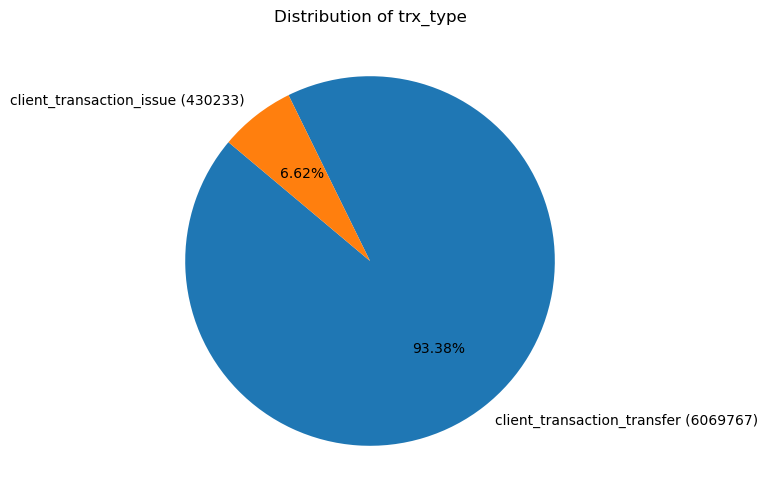

In [12]:
# Get the counts of each 'trx_type'
trx_type_counts = df['trx_type'].value_counts()

# Create a pie chart with counts displayed
plt.figure(figsize=(8, 6))
plt.pie(trx_type_counts, labels=[f'{label} ({count})' for label, count in zip(trx_type_counts.index, trx_type_counts)],
        autopct='%1.2f%%', startangle=140)
plt.title('Distribution of trx_type')
plt.show()

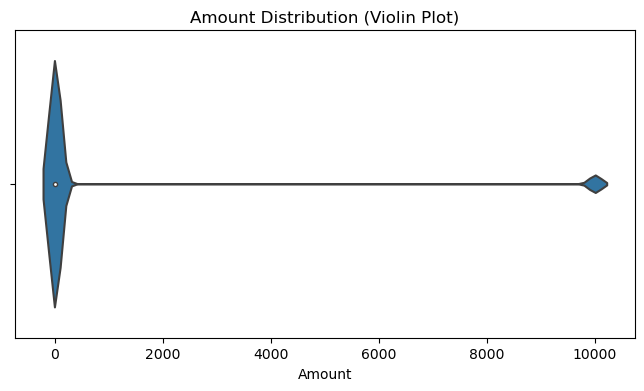

In [13]:
plt.figure(figsize=(8, 4))
sns.violinplot(x=df['amount'])
plt.title('Amount Distribution (Violin Plot)')
plt.xlabel('Amount')
plt.show()


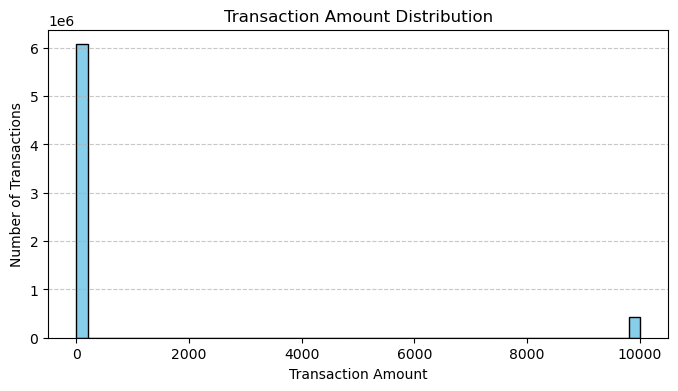

In [14]:
plt.figure(figsize=(8, 4))
df['amount'].plot(kind='hist', bins=50, edgecolor='black', color='skyblue')
plt.title('Transaction Amount Distribution')
plt.xlabel('Transaction Amount')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [15]:
# Filter rows where 'amount' is equal to 10000
filtered_df = df[df['amount'] == 10000]

# Display the subset of the DataFrame
print(filtered_df[['trx_type', 'trx_status', 'amount']])

                      trx_type trx_status   amount
0     client_transaction_issue  processed  10000.0
1     client_transaction_issue  processed  10000.0
2     client_transaction_issue  processed  10000.0
3     client_transaction_issue  processed  10000.0
4     client_transaction_issue  processed  10000.0
...                        ...        ...      ...
9770  client_transaction_issue  processed  10000.0
9771  client_transaction_issue  processed  10000.0
9772  client_transaction_issue  processed  10000.0
9773  client_transaction_issue  processed  10000.0
9774  client_transaction_issue  processed  10000.0

[430233 rows x 3 columns]


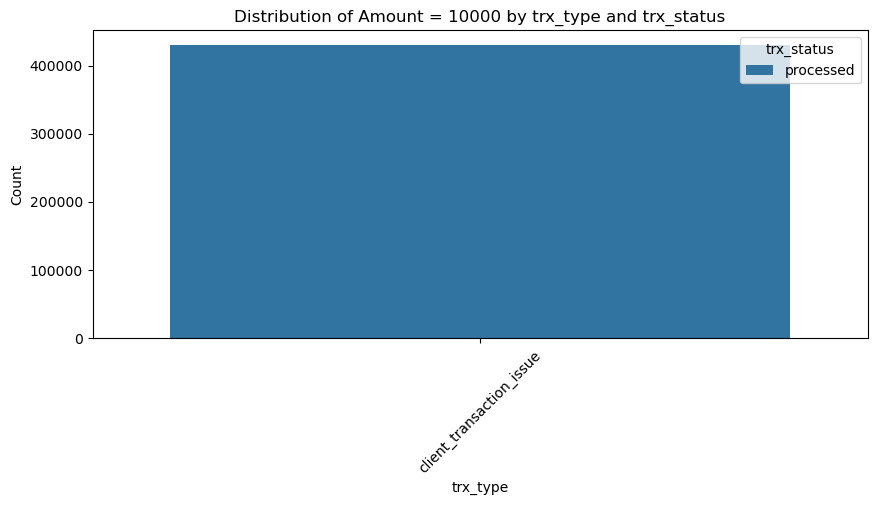

In [16]:
# Filter rows where 'amount' is equal to 10000
filtered_df = df[df['amount'] == 10000]

# Create a countplot with all 'trx_type' values
plt.figure(figsize=(10, 4))
sns.countplot(x='trx_type', hue='trx_status', data=filtered_df)
plt.title('Distribution of Amount = 10000 by trx_type and trx_status')
plt.xlabel('trx_type')
plt.ylabel('Count')
plt.legend(title='trx_status')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

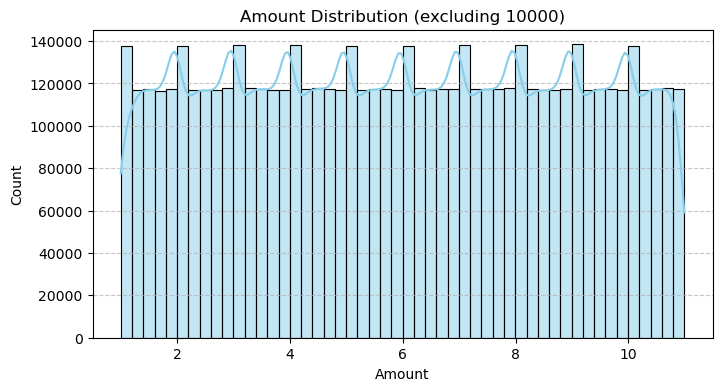

In [17]:
# Filter rows where 'amount' is not equal to 10000
filtered_df = df[df['amount'] != 10000]

# Create a histogram
plt.figure(figsize=(8, 4))
sns.histplot(filtered_df['amount'], kde=True, bins=50, edgecolor='black', color='skyblue')
plt.title('Amount Distribution (excluding 10000)')
plt.xlabel('Amount')
plt.ylabel('Count')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

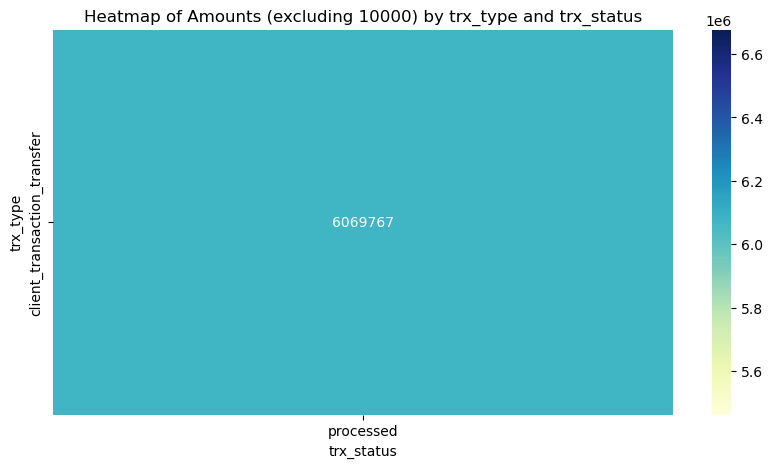

In [18]:
# Filter rows where 'amount' is not equal to 10000
filtered_df = df[df['amount'] != 10000]

# Create a heatmap
plt.figure(figsize=(10, 5))
heatmap_data = filtered_df.groupby(['trx_type', 'trx_status']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Amounts (excluding 10000) by trx_type and trx_status')
plt.xlabel('trx_status')
plt.ylabel('trx_type')
plt.show()

In [19]:
subd_df = df[(df['trx_type'] == 'client_transaction_issue') & (df['amount'] != 10000)]
subd_df

,date,time,trx_id,trx_type,trx_status,category,business_type_class,wallet_number_from,wallet_number_to,amount,description,currency,invoice_details,ip,browser_environment,datetime


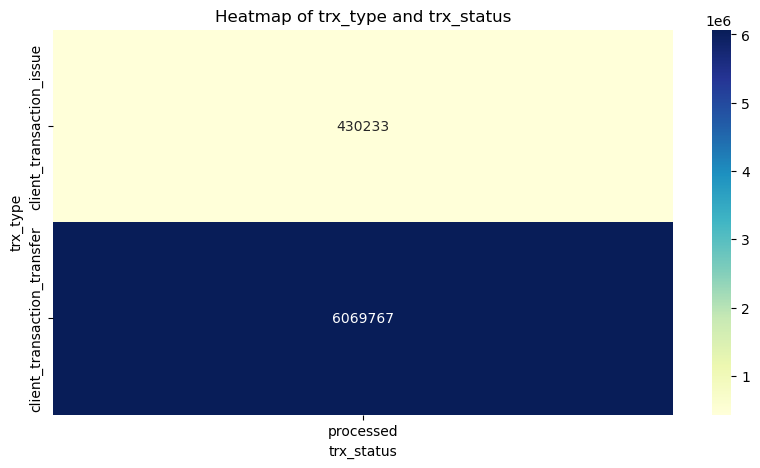

In [20]:
# Heatmap of trx_type and trx_status
plt.figure(figsize=(10, 5))
heatmap_data = df.groupby(['trx_type', 'trx_status']).size().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of trx_type and trx_status')
plt.xlabel('trx_status')
plt.ylabel('trx_type')
plt.show()

In [21]:
# Filter rows where 'wallet_number_from' is NaN and 'trx_type' is 'client_transaction_issue'
filtered_df = df[(df['wallet_number_from'].isnull()) & (df['trx_type'] == 'client_transaction_issue')]

# Display the subset of the DataFrame
filtered_df

,date,time,trx_id,trx_type,trx_status,category,business_type_class,wallet_number_from,wallet_number_to,amount,description,currency,invoice_details,ip,browser_environment,datetime
0,2021-09-24,23:12:09,6b16fd70-da27-48e9-8506-4467d8e418e8,client_transaction_issue,processed,Home,ClientTransactionProcess,NaN,29598,10000.0,Wooden Fish,EUR,Christian Page,66.99.106.232,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2021-09-24 23:12:09
1,2023-01-12,16:36:28,d51996eb-d766-4971-9839-7b9902c4e6f8,client_transaction_issue,processed,Kids,ClientTransactionProcess,NaN,64411,10000.0,Small Frozen Pizza,EUR,Joseph Arnold,147.193.110.4,Mozilla/5.0 (Windows NT 10.0; rv:109.0) Gecko/...,2023-01-12 16:36:28
2,2019-07-04,17:56:32,70b0a17b-24ce-4e16-850d-ba4520e26538,client_transaction_issue,processed,Music,ClientTransactionProcess,NaN,203804,10000.0,Chicken,EUR,Bryan Alvarez,180.38.191.114,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2019-07-04 17:56:32
3,2020-03-04,05:32:57,97eaf279-355c-4adc-bc96-a8862184fcfa,client_transaction_issue,processed,Music,ClientTransactionProcess,NaN,281050,10000.0,Practical Concrete Gloves,EUR,Eugene Bell,184.219.186.196,Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Geck...,2020-03-04 05:32:57
4,2019-02-26,02:14:23,9a73ca1c-3313-4208-a644-8d5e9336dc5a,client_transaction_issue,processed,Clothing,ClientTransactionProcess,NaN,434373,10000.0,Cotton Cheese,EUR,Ryan Briggs,96.241.27.38,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2019-02-26 02:14:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9770,2021-09-20,11:07:05,cb6c8b29-9ca1-465c-af68-2526fb5a42ab,client_transaction_issue,processed,Garden,ClientTransactionProcess,NaN,909725,10000.0,Chair,EUR,Mrs. Hannah Williams DVM,206.185.184.243,Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Geck...,2021-09-20 11:07:05
9771,2021-05-18,17:33:22,f2ea9035-e0b2-4362-9377-a2607badd45f,client_transaction_issue,processed,Games,ClientTransactionProcess,NaN,913128,10000.0,Handcrafted Ball,EUR,Erika Morris,214.98.42.180,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2021-05-18 17:33:22
9772,2019-07-12,10:55:06,d71476a7-443a-4a61-9be3-f5a271386144,client_transaction_issue,processed,Games,ClientTransactionProcess,NaN,426708301960,10000.0,Computer,EUR,Gary Gutierrez,42.230.45.110,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,2019-07-12 10:55:06
9773,2019-08-01,04:06:43,d65537f8-772c-4a65-9cb9-07f43f81b6fa,client_transaction_issue,processed,Kids,ClientTransactionProcess,NaN,714789298840,10000.0,Towels,EUR,Ashley Gilbert,215.225.143.204,Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Geck...,2019-08-01 04:06:43


In [22]:
# Filter rows where 'wallet_number_from' is NaN and 'trx_type' is 'merchant_invoice'
filtered_df = df[(df['trx_type'] == 'merchant_invoice')]

# Display the subset of the DataFrame
filtered_df

,date,time,trx_id,trx_type,trx_status,category,business_type_class,wallet_number_from,wallet_number_to,amount,description,currency,invoice_details,ip,browser_environment,datetime


In [23]:
cond = filtered_df['wallet_number_from'].isnull()
print(len(filtered_df[~cond]))
filtered_df[~cond]

0


,date,time,trx_id,trx_type,trx_status,category,business_type_class,wallet_number_from,wallet_number_to,amount,description,currency,invoice_details,ip,browser_environment,datetime


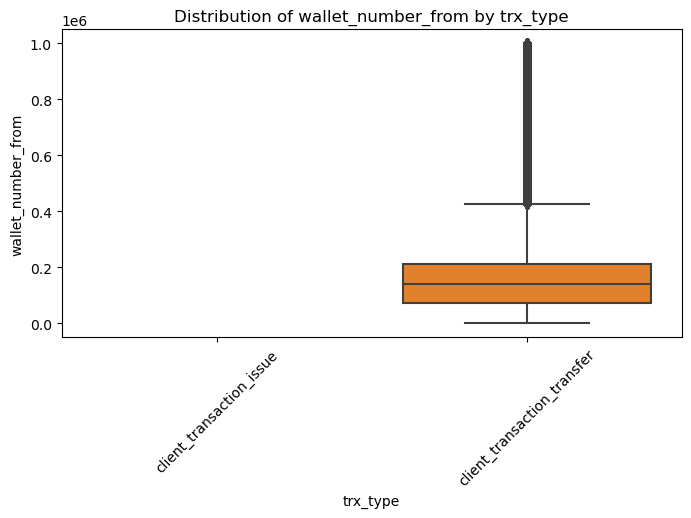

In [24]:
# Create a box plot
plt.figure(figsize=(8, 4))
sns.boxplot(x='trx_type', y='wallet_number_from', data=df)
plt.title('Distribution of wallet_number_from by trx_type')
plt.xlabel('trx_type')
plt.ylabel('wallet_number_from')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

In [25]:
# Check the distribution of 'category' values in the subset
category_distribution = filtered_df['category'].value_counts()

# Display the distribution
print("Category Distribution in Filtered Subset:")
print(category_distribution)

Category Distribution in Filtered Subset:
Series([], Name: category, dtype: int64)


In [26]:
# Check for duplicate transactions
duplicates = df[df.duplicated()]

# Display duplicate transactions
print("Duplicate Transactions:")
print(duplicates)

Duplicate Transactions:
Empty DataFrame
Columns: [date, time, trx_id, trx_type, trx_status, category, business_type_class, wallet_number_from, wallet_number_to, amount, description, currency, invoice_details, ip, browser_environment, datetime]
Index: []


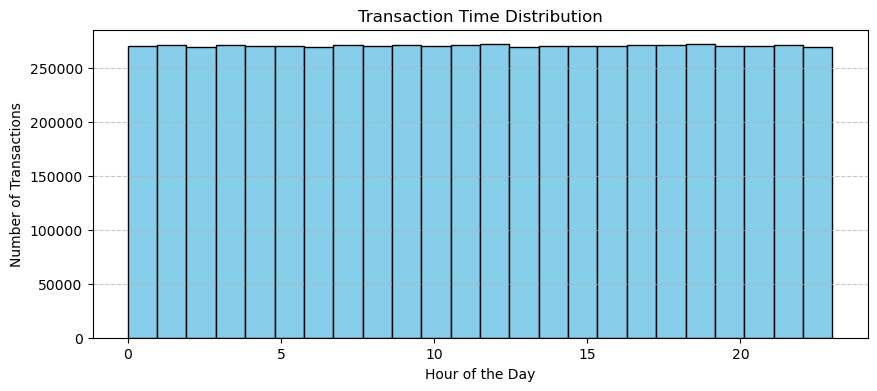

In [27]:
# Convert 'time' column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Plot Transaction Time Distribution
plt.figure(figsize=(10, 4))
df['time'].dt.hour.plot(kind='hist', bins=24, edgecolor='black', color='skyblue')
plt.title('Transaction Time Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Transactions')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

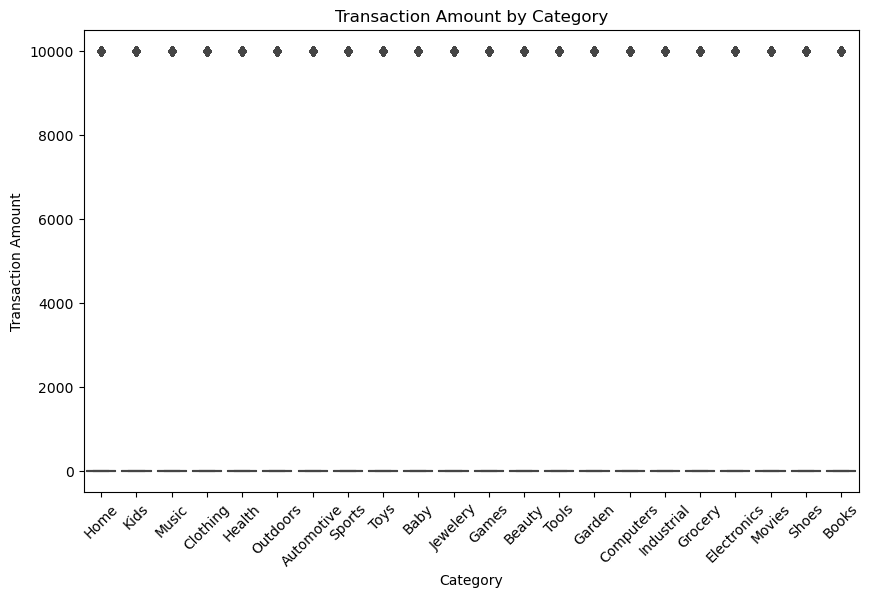

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='category', y='amount', data=df)
plt.title('Transaction Amount by Category')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

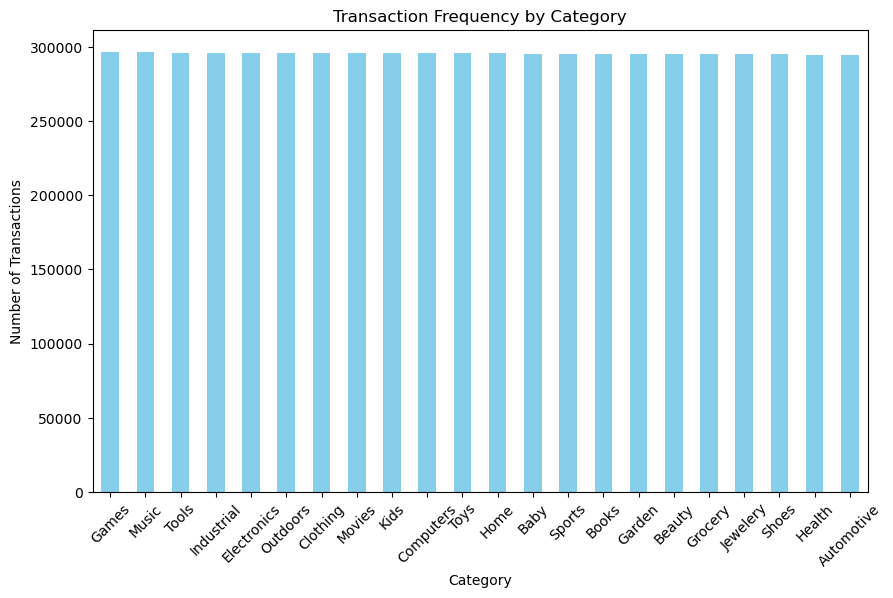

In [29]:
plt.figure(figsize=(10, 6))
df['category'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Transaction Frequency by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

In [30]:
# Pearson correlation heatmap for hour and transaction amount
filtered_df = df[df['amount'] != 10000]
correlation_matrix = filtered_df['amount'].corr(filtered_df['datetime'].dt.hour)

# Print correlation matrix
print(correlation_matrix)

0.0002097443562436329


transaction amount has not linear relationship with time of transaction

C:\Users\jithi\AppData\Local\Temp\ipykernel_59988\2934109227.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['year'] = filtered_df['datetime'].dt.year
C:\Users\jithi\AppData\Local\Temp\ipykernel_59988\2934109227.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['hour'] = filtered_df['datetime'].dt.hour


     year  hour     amount
0    2019     0  258760.77
1    2019     1  261540.23
2    2019     2  257625.19
3    2019     3  260684.33
4    2019     4  259567.85
..    ...   ...        ...
139  2024    19   42195.76
140  2024    20   42049.88
141  2024    21   41663.82
142  2024    22   42406.58
143  2024    23   42508.84

[144 rows x 3 columns]


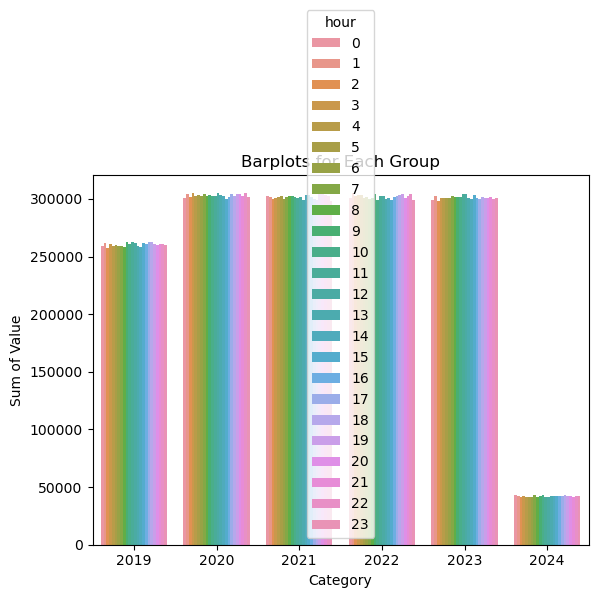

In [31]:
filtered_df['year'] = filtered_df['datetime'].dt.year
filtered_df['hour'] = filtered_df['datetime'].dt.hour
grouped = filtered_df.groupby([filtered_df['year'], filtered_df['hour']])
grouped_df = grouped['amount'].sum().reset_index()
print(grouped_df)
# Plot barplots for each group
sns.barplot(data=grouped_df, x='year', y = 'amount', hue='hour')
plt.title('Barplots for Each Group')
plt.xlabel('Category')
plt.ylabel('Sum of Value')
plt.show()

    year  hour     amount
0   2019     0  258760.77
1   2019     1  261540.23
2   2019     2  257625.19
3   2019     3  260684.33
4   2019     4  259567.85
5   2020     0  300813.17
6   2020     1  304237.56
7   2020     2  302074.04
8   2020     3  304778.67
9   2020     4  302497.90
10  2021     0  302837.67
11  2021     1  301278.38
12  2021     2  299564.36
13  2021     3  301184.34
14  2021     4  302000.49
15  2022     0  301088.30
16  2022     1  305105.02
17  2022     2  302506.99
18  2022     3  303393.02
19  2022     4  303130.22
20  2023     0  299339.31
21  2023     1  302649.70
22  2023     2  298458.37
23  2023     3  300624.70
24  2023     4  300579.39
25  2024     0   42801.56
26  2024     1   42116.46
27  2024     2   41811.87
28  2024     3   42027.45
29  2024     4   41595.13


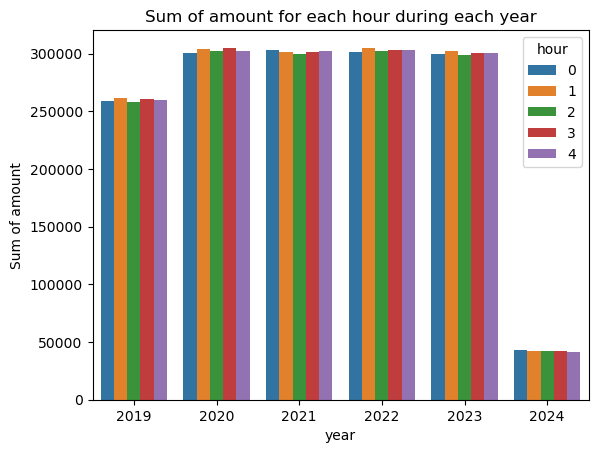

In [32]:
filtered_df = filtered_df[(filtered_df['hour'] < 5)]
grouped = filtered_df.groupby([filtered_df['year'], filtered_df['hour']])
grouped_df = grouped['amount'].sum().reset_index()
print(grouped_df)
# Plot barplots for each group
sns.barplot(data=grouped_df, x='year', y = 'amount', hue='hour')
plt.title('Sum of amount for each hour during each year')
plt.xlabel('year')
plt.ylabel('Sum of amount')
plt.show()

The transaction amount is fairly even, nothing suspicious at the moment.

In [33]:
# Group all transactions by dates
grouped = filtered_df.groupby(filtered_df['date']).count()
grouped = grouped.reset_index()
grouped = grouped.sort_values('amount')

# Store 3 least and 3 most total transactions date into two lists
least_transaction_dates = grouped.iloc[:2, :]['date'].tolist()
most_transaction_dates = grouped.iloc[-2:, :]['date'].tolist()
print(least_transaction_dates, most_transaction_dates)

['2023-12-13', '2023-03-13'] ['2022-07-20', '2020-01-20']


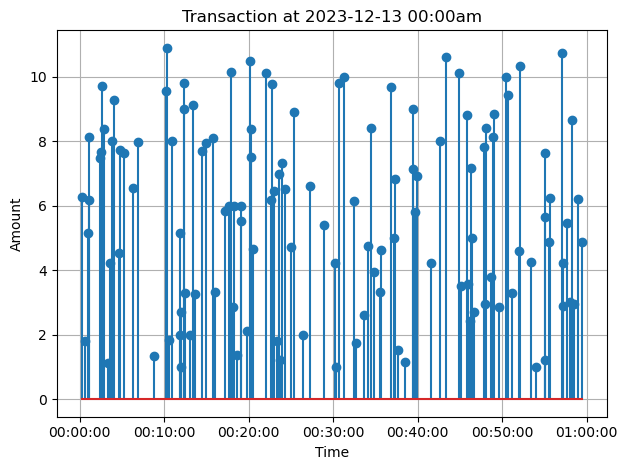

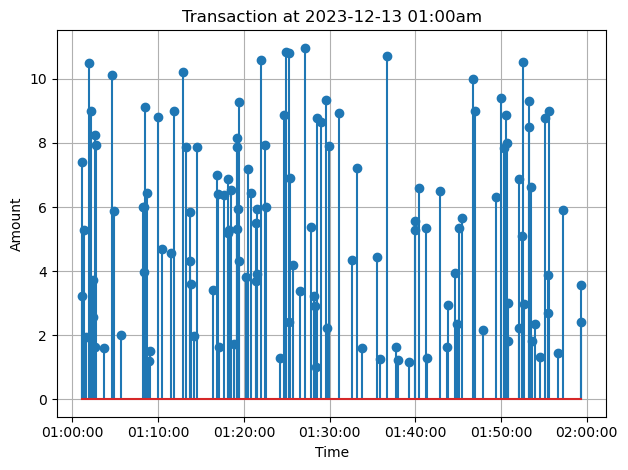

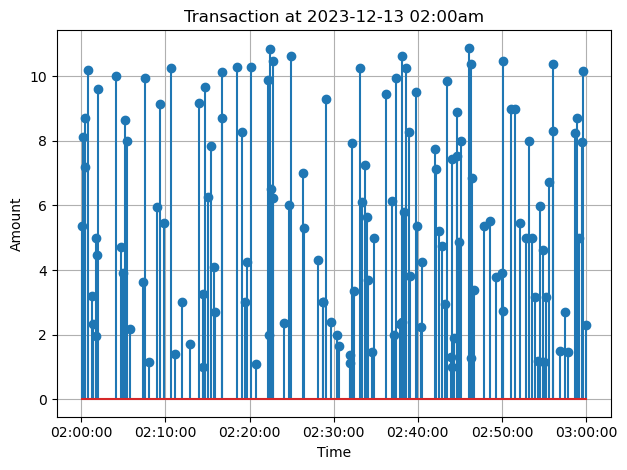

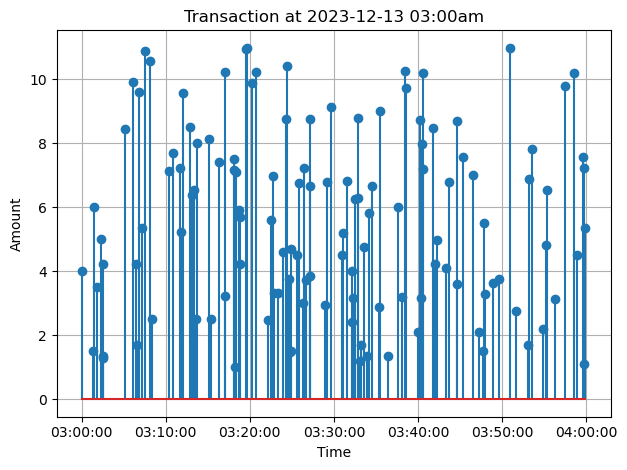

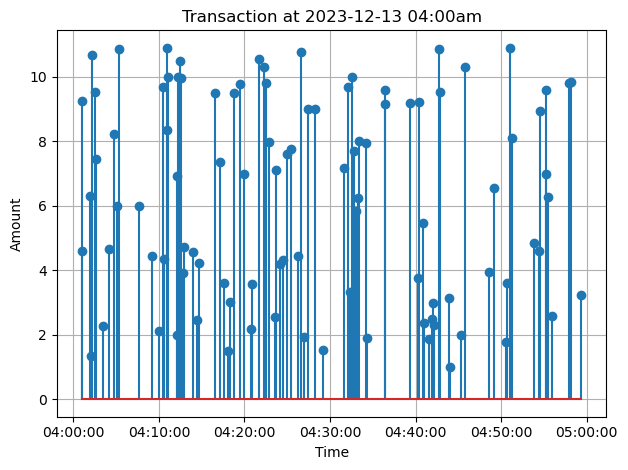

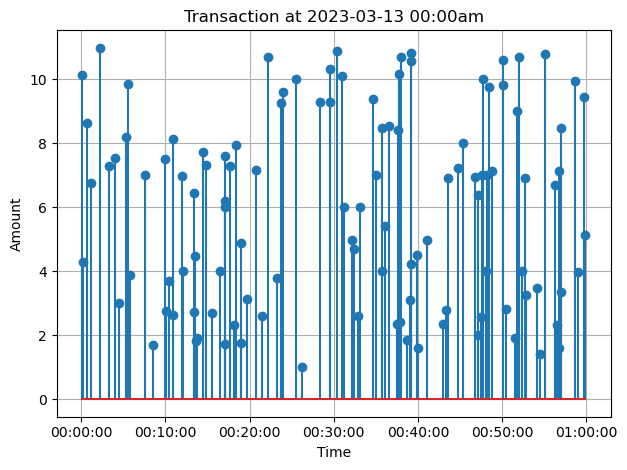

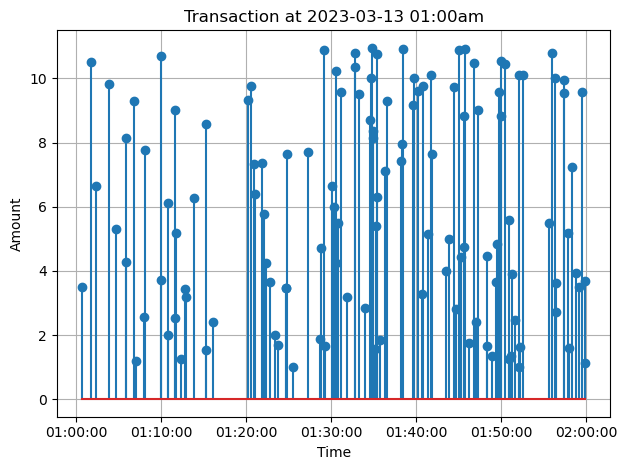

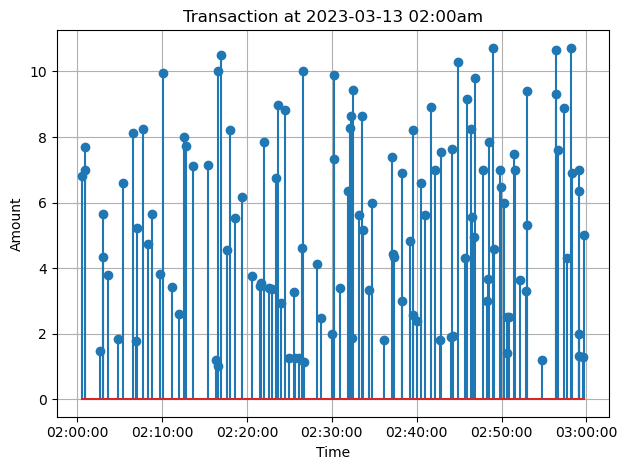

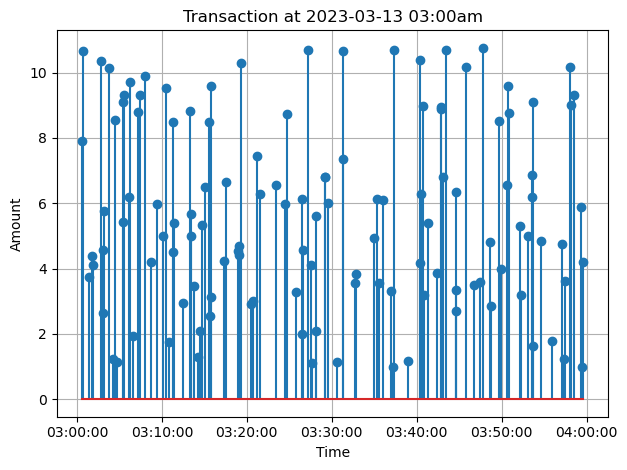

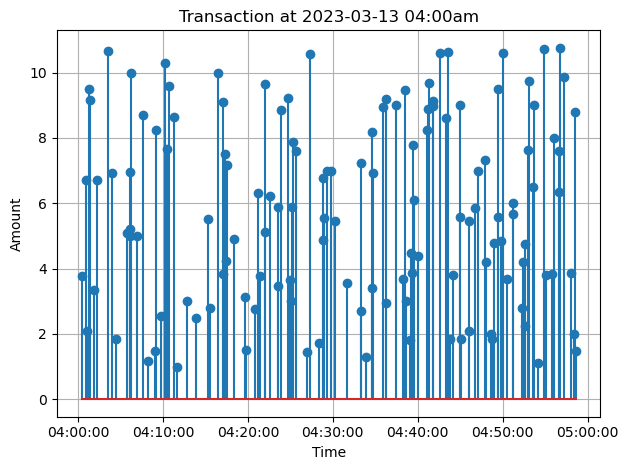

In [34]:

# Plots all transaction for the dates with least transactions from above
for date in least_transaction_dates:
    sub_df = filtered_df[filtered_df['date'] == date]
    grouped_df = sub_df.groupby(sub_df['hour'])
    
    for hour, group in grouped_df:
        #group = group.sort_values(col = [group['datetime'].dt.hour, group['datetime'].dt.minute, group['datetime'].dt.second])
        # Create a stem plot
        plt.stem(group['datetime'], group['amount'])
        plt.xlabel('Time')
        plt.ylabel('Amount')
        plt.title(f'Transaction at {date} 0{hour}:00am')
        plt.grid(True)

        plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        plt.tight_layout()
        plt.show()

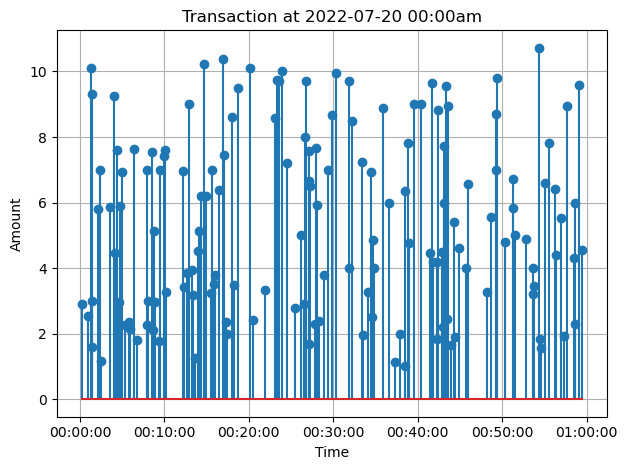

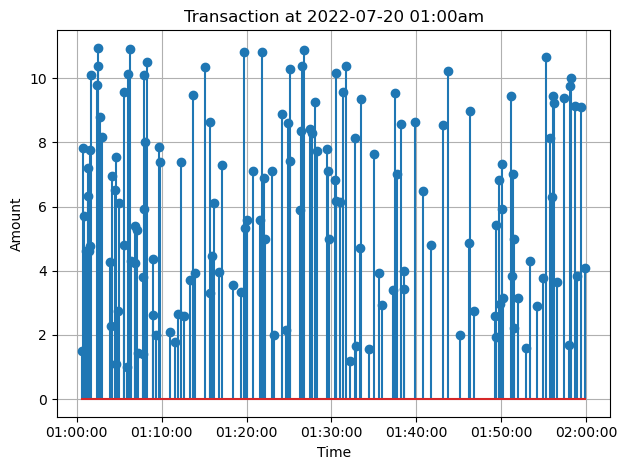

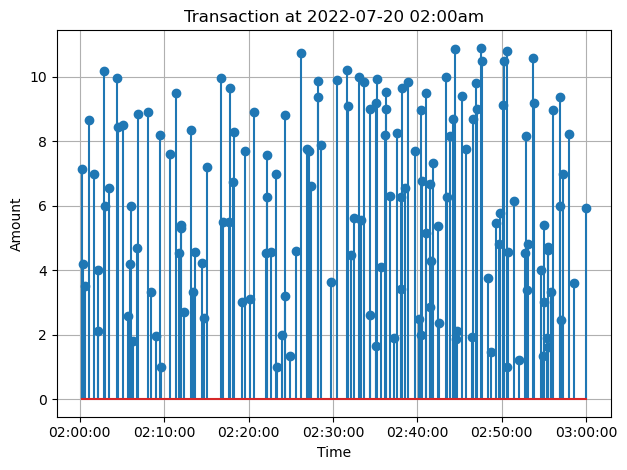

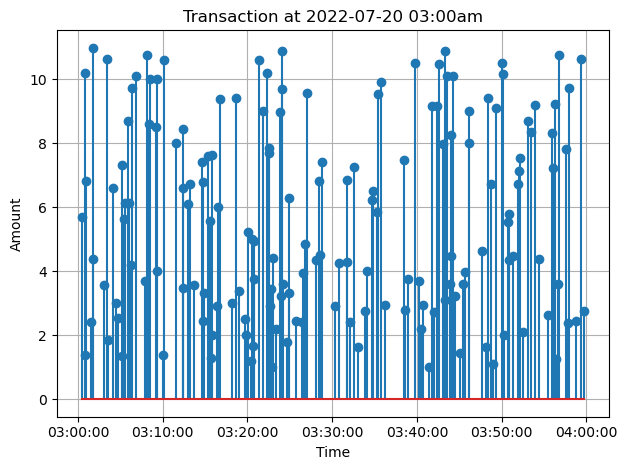

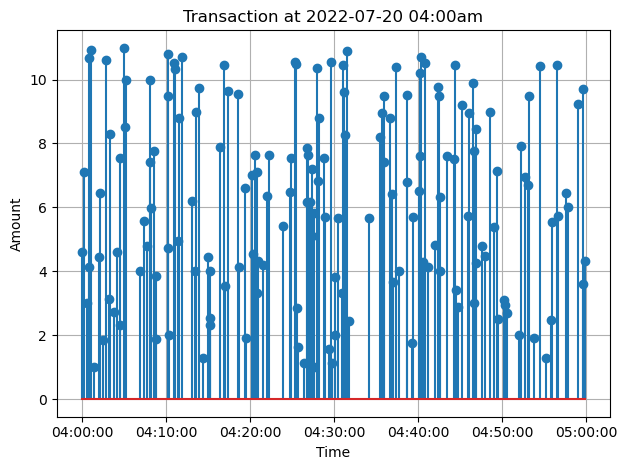

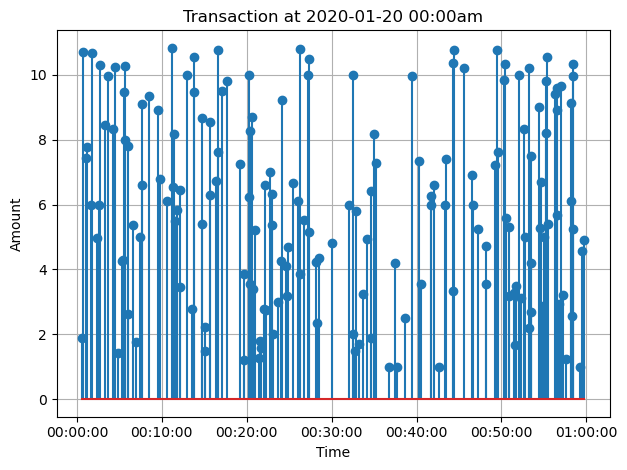

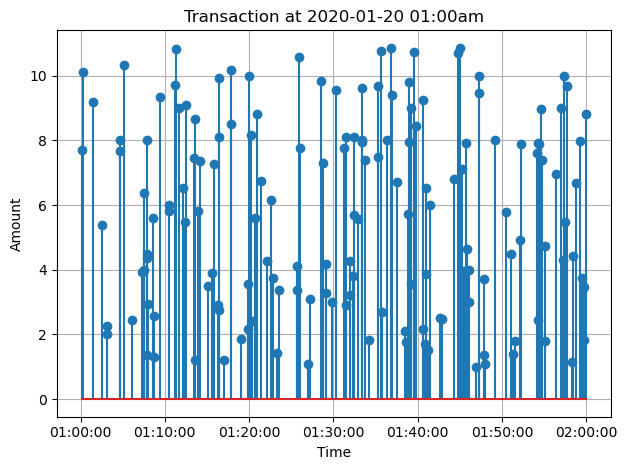

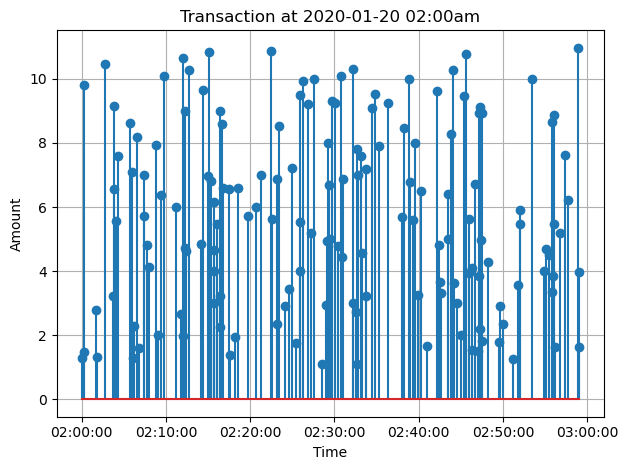

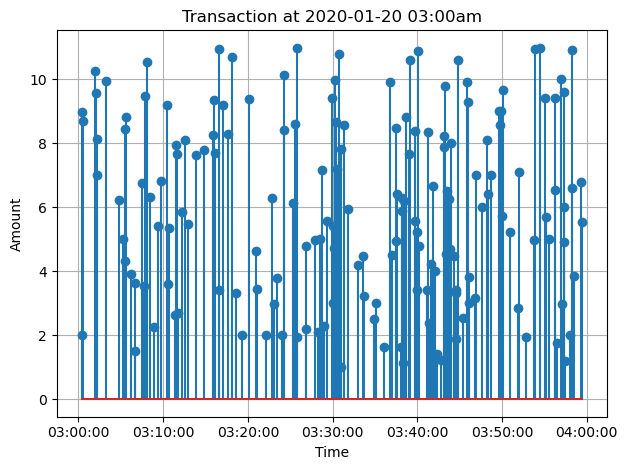

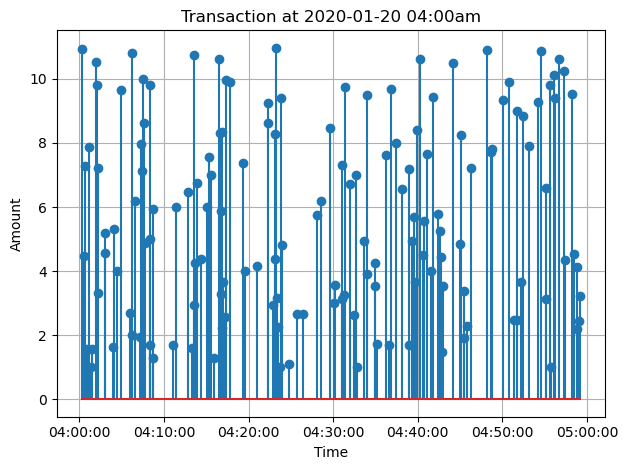

In [35]:
# Plots all transaction for the dates with most transactions from above
for date in most_transaction_dates:
    sub_df = filtered_df[filtered_df['date'] == date]
    grouped_df = sub_df.groupby(sub_df['hour'])
    
    for hour, group in grouped_df:
        #group = group.sort_values(col = [group['datetime'].dt.hour, group['datetime'].dt.minute, group['datetime'].dt.second])
        # Create a stem plot
        plt.stem(group['datetime'], group['amount'])
        plt.xlabel('Time')
        plt.ylabel('Amount')
        plt.title(f'Transaction at {date} 0{hour}:00am')
        plt.grid(True)

        plt.gca().xaxis.set_major_formatter(DateFormatter('%H:%M:%S'))
        plt.tight_layout()
        plt.show()

In [36]:
# Find consecutive transactions that took place within 1 minute frame


In [37]:
df.head()

,date,time,trx_id,trx_type,trx_status,category,business_type_class,wallet_number_from,wallet_number_to,amount,description,currency,invoice_details,ip,browser_environment,datetime
0,2021-09-24,2024-04-10 23:12:09,6b16fd70-da27-48e9-8506-4467d8e418e8,client_transaction_issue,processed,Home,ClientTransactionProcess,NaN,29598,10000.0,Wooden Fish,EUR,Christian Page,66.99.106.232,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7...,2021-09-24 23:12:09
1,2023-01-12,2024-04-10 16:36:28,d51996eb-d766-4971-9839-7b9902c4e6f8,client_transaction_issue,processed,Kids,ClientTransactionProcess,NaN,64411,10000.0,Small Frozen Pizza,EUR,Joseph Arnold,147.193.110.4,Mozilla/5.0 (Windows NT 10.0; rv:109.0) Gecko/...,2023-01-12 16:36:28
2,2019-07-04,2024-04-10 17:56:32,70b0a17b-24ce-4e16-850d-ba4520e26538,client_transaction_issue,processed,Music,ClientTransactionProcess,NaN,203804,10000.0,Chicken,EUR,Bryan Alvarez,180.38.191.114,Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:109...,2019-07-04 17:56:32
3,2020-03-04,2024-04-10 05:32:57,97eaf279-355c-4adc-bc96-a8862184fcfa,client_transaction_issue,processed,Music,ClientTransactionProcess,NaN,281050,10000.0,Practical Concrete Gloves,EUR,Eugene Bell,184.219.186.196,Mozilla/5.0 (X11; Linux x86_64; rv:109.0) Geck...,2020-03-04 05:32:57
4,2019-02-26,2024-04-10 02:14:23,9a73ca1c-3313-4208-a644-8d5e9336dc5a,client_transaction_issue,processed,Clothing,ClientTransactionProcess,NaN,434373,10000.0,Cotton Cheese,EUR,Ryan Briggs,96.241.27.38,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,2019-02-26 02:14:23
